In [15]:
from lib.utils import *
X,y = load_eeg_label_pair()
from sklearn.model_selection import train_test_split

In [240]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=0)
X_train = torch.vstack([X_train.mean(axis=1),X_train.std(axis=1),X_train.sum(axis=1),(X_train**2).sum(axis=1)]).T
X_test = torch.vstack([X_test.mean(axis=1),X_test.std(axis=1),X_test.sum(axis=1),(X_test**2).sum(axis=1)]).T

In [241]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score

In [258]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(f'f1 score: {f1_score(y_true=y_test,y_pred=y_pred,average="macro")}')
print(f'accuracy: {accuracy_score(y_true=y_test,y_pred=y_pred)}')

f1 score: 0.489682013610343
accuracy: 0.7008101851851852


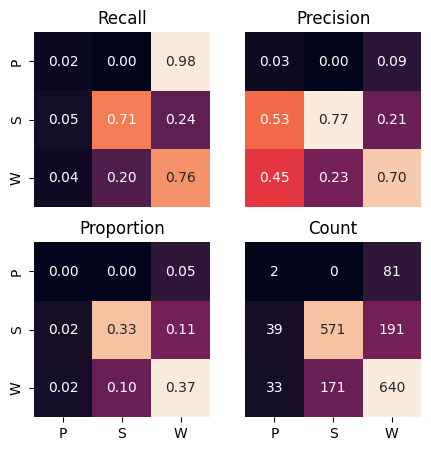

In [261]:
from lib.utils import cm_grid
cm_grid(y_true=y_test.argmax(axis=1),y_pred=y_pred.argmax(axis=1))

In [250]:
clf.feature_importances_

array([0.11595442, 0.4416252 , 0.27611435, 0.16630603])

In [249]:
f1_score(y_true=y_test,y_pred=torch.nn.functional.one_hot(torch.randint(0,3,(len(y_test),))).float(),average='macro')

0.2951630800846502